## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os

## Load the dataset

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

## Analyze the dataset

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,NaN,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## Describe the dataset

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.shape

(1000, 8)

## Checking which columns contain null values

In [7]:
df.isnull().sum()

gender                         1
race/ethnicity                 1
parental level of education    0
lunch                          2
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df=df.dropna()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       996 non-null    object
 1   race/ethnicity               996 non-null    object
 2   parental level of education  996 non-null    object
 3   lunch                        996 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   996 non-null    int64 
 6   reading score                996 non-null    int64 
 7   writing score                996 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.0+ KB


## Duplicate Values

In [10]:
df_d=df.duplicated().any()
df_d

False

### Preprocessing 

In [11]:
df['race/ethnicity'].value_counts()

group C    318
group D    262
group B    189
group E    139
group A     88
Name: race/ethnicity, dtype: int64

In [12]:
df['parental level of education'].value_counts()

some college          226
associate's degree    221
high school           196
some high school      177
bachelor's degree     118
master's degree        58
Name: parental level of education, dtype: int64

In [13]:
df['lunch'].value_counts()

standard        642
free/reduced    354
Name: lunch, dtype: int64

In [14]:
df['test preparation course'].value_counts()

none         639
completed    357
Name: test preparation course, dtype: int64

In [15]:
df['test preparation course'].replace("none", np.NaN, inplace=True)
df['test preparation course'].fillna(value="not completed", inplace=True)

In [16]:
df['test preparation course']

0      not completed
1          completed
3      not completed
4      not completed
5      not completed
           ...      
995        completed
996    not completed
997        completed
998        completed
999    not completed
Name: test preparation course, Length: 996, dtype: object

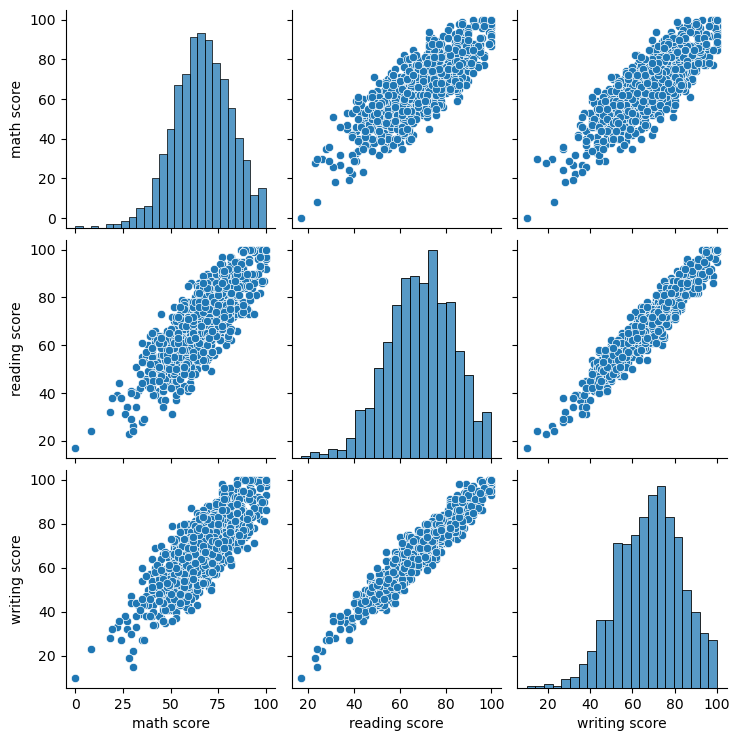

In [17]:
sns.pairplot(df.iloc[:,[5,6,7]])

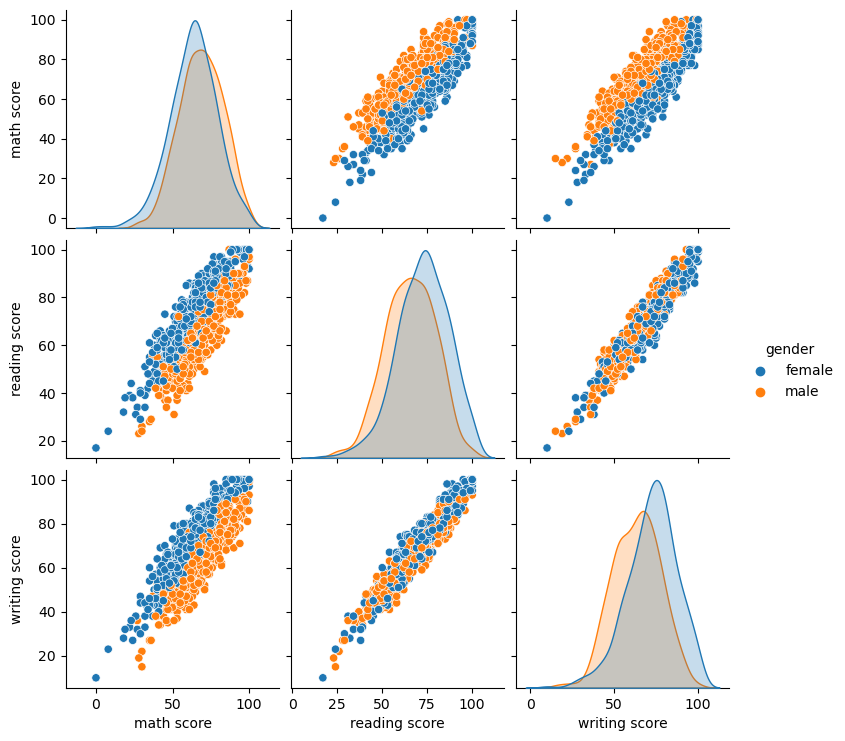

In [18]:
sns.pairplot(data = df,hue="gender")
plt.show()

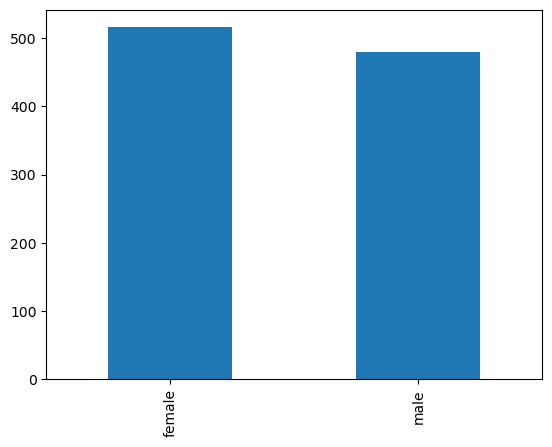

In [19]:
df ['gender'].value_counts().plot(kind='bar')
plt.show()

### outlier

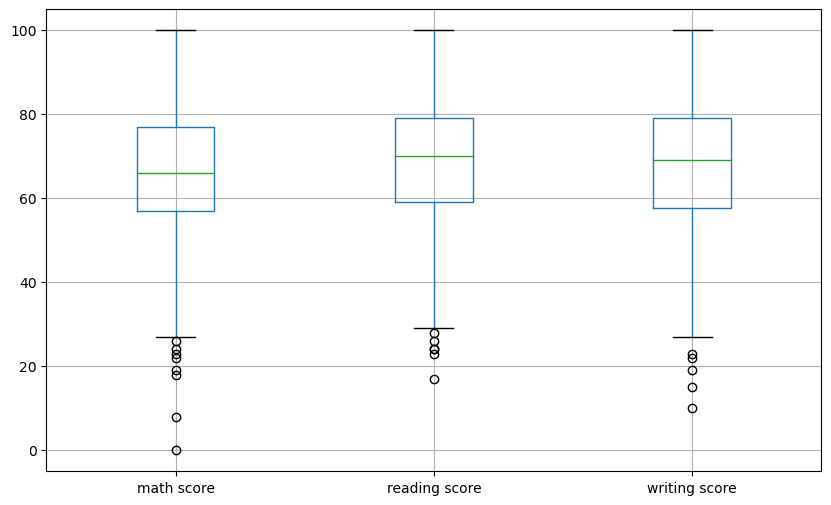

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
df.boxplot();

# Encoder

In [21]:
df_En = df.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
LablE = LabelEncoder()
df_En["gender"]= LablE.fit_transform(df["gender"])
df_En["race/ethnicity"]= LablE.fit_transform(df["race/ethnicity"])
df_En["parental level of education"]= LablE.fit_transform(df["parental level of education"])
df_En["lunch"]= LablE.fit_transform(df["lunch"])
df_En["test preparation course"]= LablE.fit_transform(df["test preparation course"])

In [23]:
df_En

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


### Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
X=df.iloc[:,[5,6,7]].values
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [25]:
X

array([[ 0.39324422,  0.19565715,  0.39380507],
       [ 0.19476217,  1.43208345,  1.31809691],
       [-1.26077285, -0.8346981 , -1.58682031],
       ...,
       [-0.46684466,  0.1269668 , -0.20038255],
       [ 0.12860149,  0.60779925,  0.5918676 ],
       [ 0.72404764,  1.15732205,  1.18605521]])

## k-mean

C:\Users\bob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

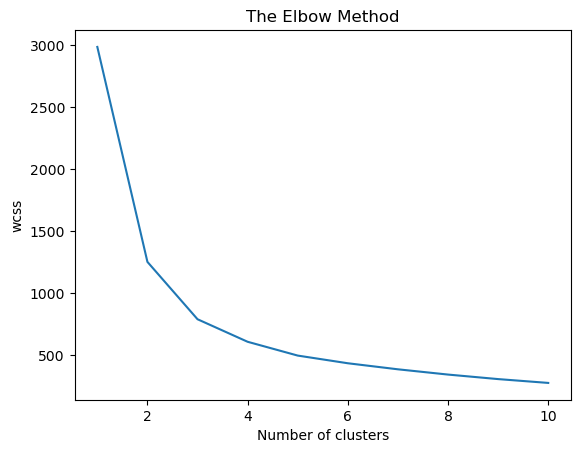

In [26]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [27]:
kmeans= KMeans(n_clusters=3, init = "k-means++", random_state=0)
y_kmeans= kmeans.fit_predict(X)

C:\Users\bob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
df['cluster'] = y_kmeans
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group B,bachelor's degree,standard,not completed,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,1
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,2
4,male,group C,some college,standard,not completed,76,78,75,1
5,female,group B,associate's degree,standard,not completed,71,83,78,1
6,female,group B,some college,standard,completed,88,95,92,1
7,male,group B,some college,free/reduced,not completed,40,43,39,2
8,male,group D,high school,free/reduced,completed,64,64,67,0
9,female,group B,high school,free/reduced,not completed,38,60,50,2
10,male,group C,associate's degree,standard,not completed,58,54,52,2


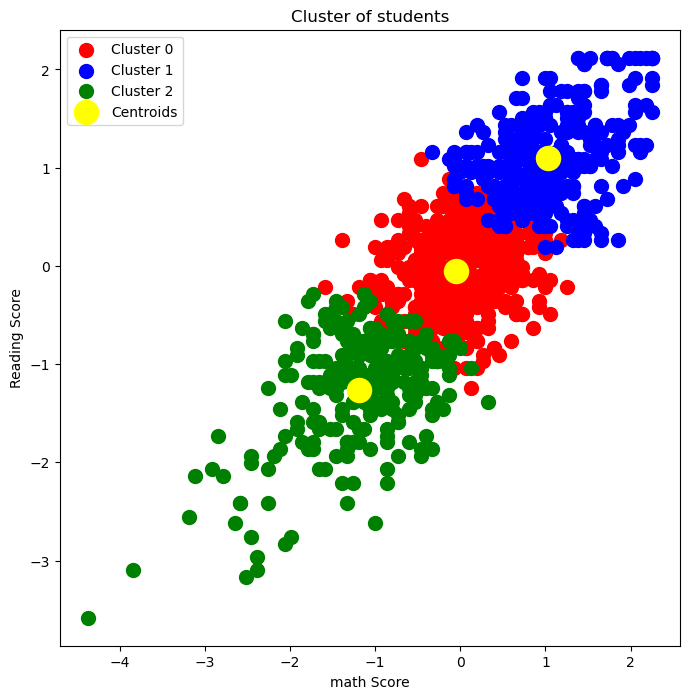

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c="red", label= "Cluster 0")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c="blue", label= "Cluster 1")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c="green", label= "Cluster 2")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="Centroids")
plt.title("Cluster of students")
plt.xlabel("math Score")
plt.ylabel("Reading Score")
plt.legend()
plt.show()

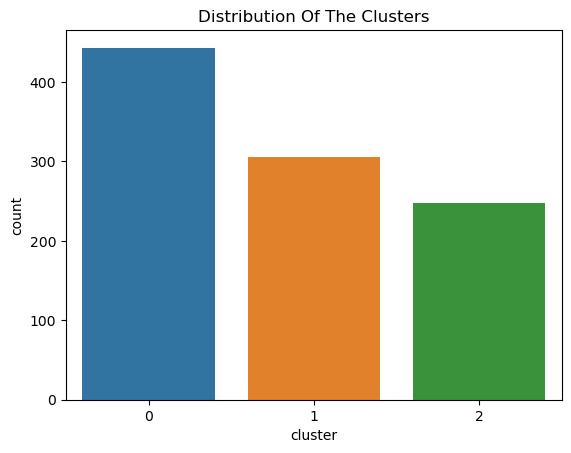

In [30]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [31]:
cluster_means = df.groupby('cluster')[['math score', 'reading score', 'writing score']].mean()
cluster_means

,math score,reading score,writing score
cluster,,,
0,65.338600,68.458239,67.821670
1,81.672131,85.147541,84.193443
2,48.133065,50.717742,48.544355


In [46]:
gender_dis = df.groupby(['cluster', 'gender']).size().unstack(fill_value=0)
gender_dis

gender,female,male
cluster,,
0,232,211
1,180,125
2,104,144


In [45]:
lunch_dis = df.groupby(['cluster', 'lunch']).size().unstack(fill_value=0)
lunch_dis

lunch,free/reduced,standard
cluster,,
0,145,298
1,71,234
2,138,110


## Hierarchical Clustering

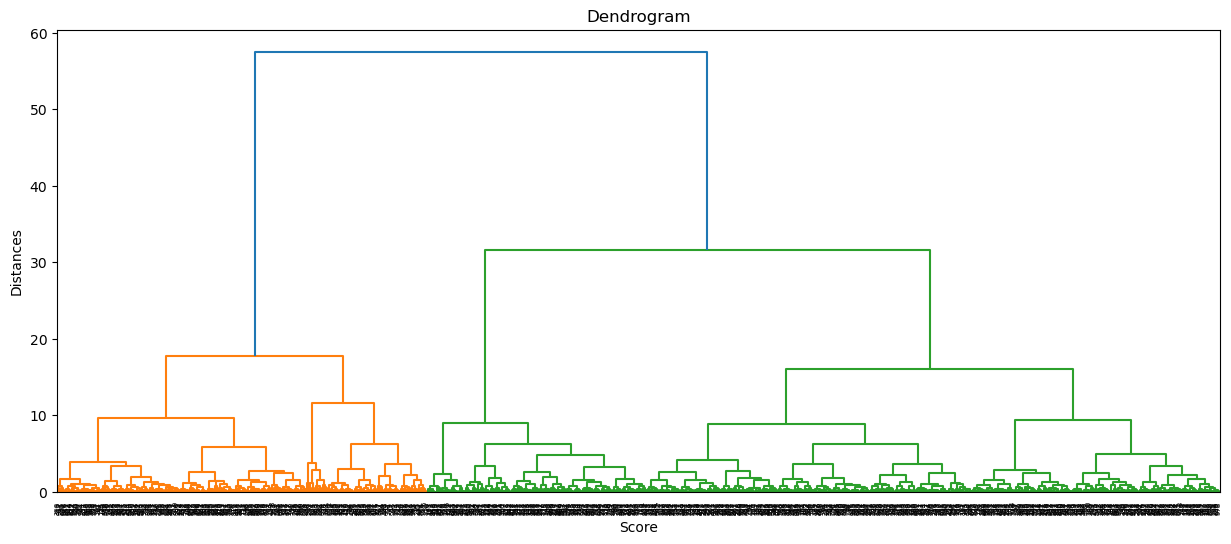

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram=sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Score")
plt.ylabel("Distances")
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=3, affinity= "euclidean", linkage="ward")
y_hc= hc.fit_predict(X)

C:\Users\bob\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


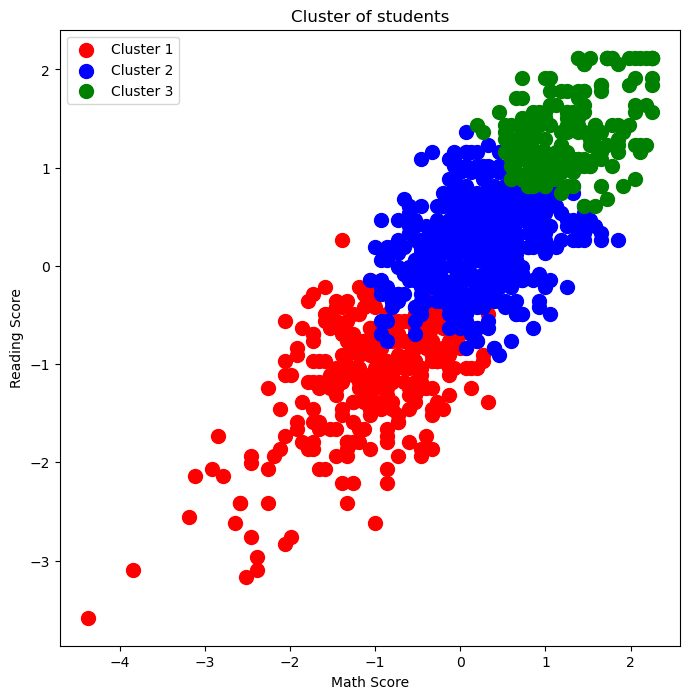

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, c="red", label= "Cluster 1")
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, c="blue", label= "Cluster 2")
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=100, c="green", label= "Cluster 3")
plt.title("Cluster of students")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.legend()
plt.show()